In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from IPython import HTML

ImportError: cannot import name 'HTML' from 'IPython' (/Users/pranamshetty/Developer/Projects/TomatoSaviorAI/venv/lib/python3.11/site-packages/IPython/__init__.py)

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    labels='inferred',
    batch_size= BATCH_SIZE,
    image_size= IMAGE_SIZE,
    shuffle=True,
    seed=32,

)

Found 16011 files belonging to 10 classes.


In [5]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

501

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 6 0 5 2 7 2 7 7 9 2 4 3 2 5 6 2 5 6 1 4 0 7 5 0 8 0 2 4 6 9 9]


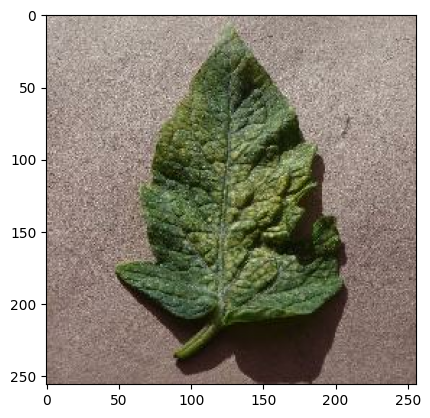

In [17]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [ ]:
EPOCHS = 50


In [24]:
def get_partitioned_datasets(dataset, train_split=0.8, val_split = 0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=10)

    dataset_len = len(dataset)
    train_len = int( train_split * dataset_len)
    train_dataset = dataset.take(train_len)
    dataset = dataset.skip(train_len)

    val_len = int(val_split * dataset_len)
    val_dataset = dataset.take(val_len)
    dataset = dataset.skip(val_len)

    test_len = dataset_len - train_len - val_len
    test_dataset = dataset.take(test_len)

    return train_dataset, val_dataset, test_dataset

In [25]:
train_dataset, val_dataset, test_dataset = get_partitioned_datasets(dataset)

In [26]:
len(train_dataset)

400

In [27]:
len(val_dataset)

50

In [28]:
len(test_dataset)

51

In [29]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)